**Importing necessary libraries**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


**Loading Data**

In [19]:
data = pd.read_csv('../data/product_sales.csv')

**Data Preperation**

- Rows with missing revenue are removed to ensure the target variable is available for training.
- Categorical variables (sales_method, state) are encoded using one-hot encoding, while numerical variables (nb_sold, nb_site_visits, years_as_customer) are standardized.

In [20]:
#Drop revenue rows with null values.
data = data.dropna(subset=['revenue'])

#Define Categorical and numerical columns
categorical_features = ['sales_method','state']
numerical_features = ['nb_sold','nb_site_visits','years_as_customer']

#Define Preprocessors
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')
numerical_transformer = StandardScaler()

#Creating a column transormer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

**Feature and Target Definition**

In [21]:
X = data[categorical_features + numerical_features]
y = data['revenue']

#Test train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Model Training and Evaluation**

- Three regression models are trained: Linear Regression (baseline), Random Forest, and XGBoost.
- A pipeline integrates preprocessing (encoding/scaling) and model training for seamless execution.

In [22]:
#Initialize Models
models = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    'XGBoost' : Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', xgb.XGBRegressor(random_state=42))
    ])
}

**Evaluation Metrics**
- R²: Measures how well the model explains the variance in the target variable.
- MAE: Captures the average absolute difference between actual and predicted values.
- RMSE: Represents the standard deviation of prediction errors.

In [23]:

#Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #Calculate metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))

    results[name] = {'R²': r2, 'MAE' : mae, 'RMSE' : rmse}

    print(f"{name} Results:")
    print(f"R²: {r2:.4f}, MAE: {mae:.4f}, RMSE: {rmse:.4f}\n")

Linear Regression Results:
R²: 0.9788, MAE: 4.5819, RMSE: 6.7949

Random Forest Results:
R²: 0.9971, MAE: 1.8874, RMSE: 2.5050

XGBoost Results:
R²: 0.9975, MAE: 1.7843, RMSE: 2.3204



**Visualization**
- Scatter plots show the relationship between actual and predicted revenue.
- Feature importance charts for tree-based models (Random Forest and XGBoost) reveal the contribution of each feature to predictions.

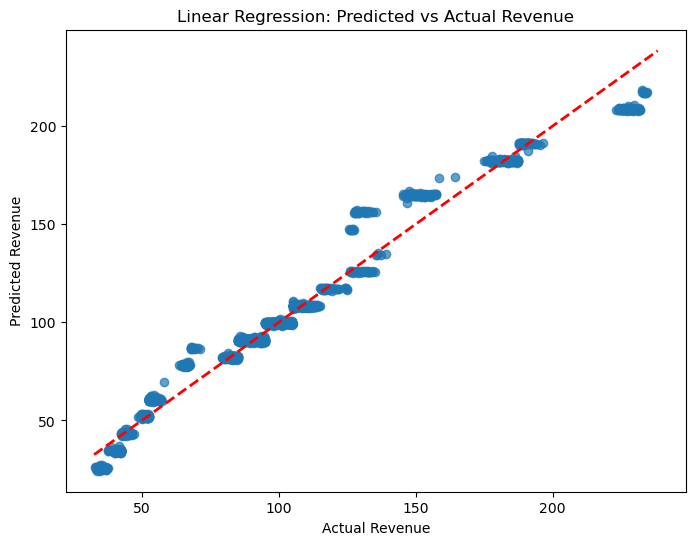

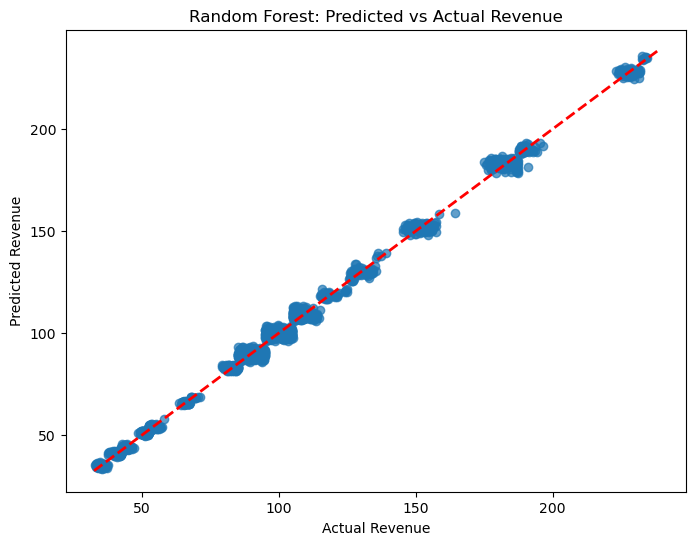

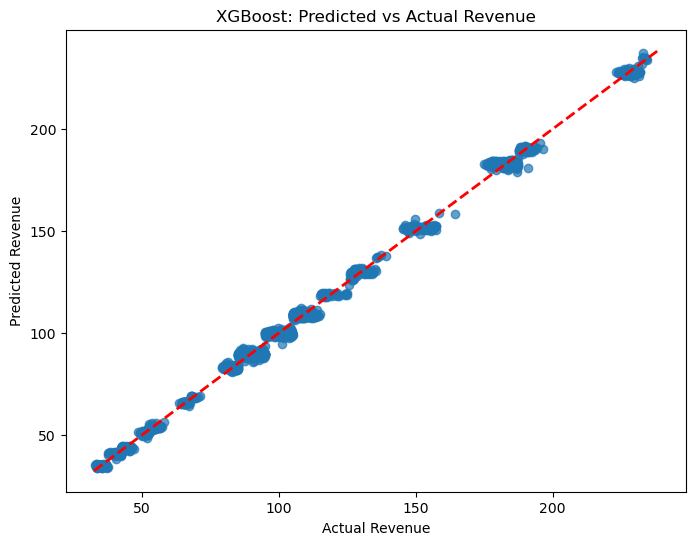

In [24]:
#Predicted vs Actual Revenue
for name, model in models.items():
    y_pred = model.predict(X_test)
    plt.figure(figsize=(8,6))
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red', linewidth=2)
    plt.title(f"{name}: Predicted vs Actual Revenue")
    plt.xlabel("Actual Revenue")
    plt.ylabel("Predicted Revenue")
    plt.show()

**Interpretation of the Results**

Linear Rgression:
- R² (0.9788): This means 97.88% of the variance in the revenue is explained by the model.
- MAE (4.5819): On average, the model's predictions deviate from the actual revenue by around 4.58 units.
- RMSE (6.7949): The errors have a standard deviation of approximately 6.79, indicating some variability in the predictions.
- Visualization: The scatter plot shows a linear trend, but some points deviate from the red line, showing a few larger prediction errors.

Random Forest:
- R² (0.9971): This shows an almost perfect fit, with 99.71% of the variance in revenue explained by the model.
- MAE (1.8874): The average prediction error is significantly lower compared to linear regression.
- RMSE (2.5050): A low RMSE suggests tight clustering of predictions around actual values.
- Visualization: The scatter plot aligns more closely with the red line, indicating better predictions compared to linear regression.

XGBoost:
- R² (0.9975): Slightly better than Random Forest, with 99.75% of the variance explained.
- MAE (1.7843): The smallest average error among the models.
- RMSE (2.3204): The lowest RMSE, reflecting highly accurate predictions with minimal deviation.
- Visualization: The scatter plot is nearly identical to Random Forest but slightly closer to the red line.

**Summary**
- XGBoost outperforms the other models in terms of accuracy (highest R², lowest MAE, and RMSE), followed closely by Random Forest.
- Linear Regression, while a simpler model, performs decently but shows higher prediction errors compared to the tree-based models.

The tree-based models (Random Forest and XGBoost) excel because they can handle non-linear relationships and interactions between features effectively, which the linear regression model might struggle with.

If the goal is to prioritize predictive accuracy, XGBoost is the best choice. However, if interpretability and simplicity are more critical, Linear Regression is a reasonable alternative.